In [1]:
import sys
#!{sys.executable} -m pip install sklearn
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# 17 02 2022 / 24 02 2022
Dist_prism_12_240222 = 0.8882613537922258
Dist_prism_13_240222 = 0.8262903370535766
Dist_prism_23_240222 = 1.0377436460567973
Dist_GPS_12_240222 = 0.7809786915630756
Dist_GPS_13_240222 = 0.8378323585433202
Dist_GPS_23_240222 = 0.5191788936274444   

# 07 03 2022
Dist_prism_12_070322 = 0.8832836583456264
Dist_prism_13_070322 = 0.8247449387008166
Dist_prism_23_070322 = 1.039409793600046
Dist_GPS_12_070322 = 0.7781099344563802
Dist_GPS_13_070322 = 0.8431026980109139
Dist_GPS_23_070322 = 0.5157221841320069

# 12 03 2022
Dist_prism_12_120322 = 0.8860734460339026
Dist_prism_13_120322 = 0.8303896290142598
Dist_prism_23_120322 = 1.0393117663247973
Dist_GPS_12_120322 = 0.7829424296161074
Dist_GPS_13_120322 = 0.8415176433032493
Dist_GPS_23_120322 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
Dist_prism_12_140322 = 0.8873171656784946
Dist_prism_13_140322 = 0.8272212117473343
Dist_prism_23_140322 = 1.0379270641796363
Dist_GPS_12_140322 = 0.7829081036179948
Dist_GPS_13_140322 = 0.8424633975958637
Dist_GPS_23_140322 = 0.5165807364575292

# 31 03 2022
Dist_prism_12_310322 = 0.8873171656784946
Dist_prism_13_310322 = 0.8272212117473343
Dist_prism_23_310322 = 1.0379270641796363
Dist_GPS_12_310322 = 0.7829081036179948
Dist_GPS_13_310322 = 0.8424633975958637
Dist_GPS_23_310322 = 0.5165807364575292

# 27 04 2022
Dist_prism_12_270422 = 0.8856608085851714
Dist_prism_13_270422 = 0.8264452483880412
Dist_prism_23_270422 = 1.0384219210289538
Dist_GPS_12_270422 = 0.7809547832390561
Dist_GPS_13_270422 = 0.8259590286006459
Dist_GPS_23_270422 = 0.5191274645630007  

# 27 04 2022 soir
Dist_prism_12_270422_soir = 0.8868846942534616
Dist_prism_13_270422_soir = 0.829169129877633
Dist_prism_23_270422_soir = 1.0387571594276301
Dist_GPS_12_270422_soir = 0.7837749633840095
Dist_GPS_13_270422_soir = 0.8323125081688734
Dist_GPS_23_270422_soir = 0.5187055120945835

# 05 05 2022
Dist_prism_12_050522 = 0.3819811991689936
Dist_prism_13_050522 = 0.4426382054042266
Dist_prism_23_050522 = 0.2564685508415531

# 13 05 2022
Dist_prism_12_130522 = 0.8113569618671205
Dist_prism_13_130522 = 0.8695313906832193
Dist_prism_23_130522 = 1.0383292631343506
Dist_GPS_12_130522 = 0.7800801192552722
Dist_GPS_13_130522 = 0.8396027021467387
Dist_GPS_23_130522 = 0.5157656903777014

# 23 05 2022
Dist_prism_12_230522 = 0.3851913749758221
Dist_prism_13_230522 = 0.4433899497583272
Dist_prism_23_230522 = 0.25861327466684897

Inter_distance = [[Dist_prism_12_240222,Dist_prism_13_240222,Dist_prism_23_240222,Dist_GPS_12_240222,Dist_GPS_13_240222,Dist_GPS_23_240222],
                 [Dist_prism_12_070322,Dist_prism_13_070322,Dist_prism_23_070322,Dist_GPS_12_070322,Dist_GPS_13_070322,Dist_GPS_23_070322],
                 [Dist_prism_12_120322,Dist_prism_13_120322,Dist_prism_23_120322,Dist_GPS_12_120322,Dist_GPS_13_120322,Dist_GPS_23_120322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],
                 [Dist_prism_12_270422,Dist_prism_13_270422,Dist_prism_23_270422,Dist_GPS_12_270422,Dist_GPS_13_270422,Dist_GPS_23_270422],
                 [Dist_prism_12_270422_soir,Dist_prism_13_270422_soir,Dist_prism_23_270422_soir,Dist_GPS_12_270422_soir,Dist_GPS_13_270422_soir,Dist_GPS_23_270422_soir],
                 [Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522,Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522],
                 [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                 [Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522,Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522],]


In [3]:
tfuu = importlib.reload(tfuu)
index_prism = 10

#path = "./data/prediction/TS/20220316/"
#prefix = "GP-10-20"
#P1 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
#P2 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
#P3 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

path = "./data/prediction/TS/20220523_empty/"
prefix = "nr_trimble"
P1 = tfuu.read_prediction_data_resection_csv_file(path+prefix +"_1.csv")
P2 = tfuu.read_prediction_data_resection_csv_file(path+prefix +"_2.csv")
P3 = tfuu.read_prediction_data_resection_csv_file(path+prefix +"_3.csv")

dist_prism = []
origin = 0
#origin = min(P1[0,0],P2[0,0],P3[0,0])
for i in range(0,len(P1[:,0])):
    dp1 = abs(np.linalg.norm(P1[i,1:4]-P2[i,1:4])-Inter_distance[index_prism][0])*1000
    dp2 = abs(np.linalg.norm(P1[i,1:4]-P3[i,1:4])-Inter_distance[index_prism][1])*1000
    dp3 = abs(np.linalg.norm(P3[i,1:4]-P2[i,1:4])-Inter_distance[index_prism][2])*1000
    dist_prism.append(np.array([P1[i,0]-origin, dp1, dp2, dp3]))
dist_prism = np.array(dist_prism)

In [4]:
# Read rosbag of grand axe and show the trajectory
ttfu = importlib.reload(tfuu)

#file_name = './data/total_station/20220224/20220224_theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220307/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220312/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220314/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220316/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-1/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-2/theodolite_reference_prisms.txt'

#trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)

#file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"
#file = "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag"
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"
#file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag"  # Tree experiments
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/constrained_2022-05-23-18-56-16.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/cones_filtered_2022-05-23-19-31-32.bag"
file = "/home/norlab/Data/IROS_2022/20220523_TS/empty_filtered_2022-05-23-19-18-35.bag"

time_trimble_1_g, time_trimble_2_g, time_trimble_3_g, distance_1_g, distance_2_g, distance_3_g, azimuth_1_g, azimuth_2_g, azimuth_3_g, elevation_1_g, elevation_2_g, elevation_3_g = ttfu.read_rosbag_theodolite_without_tf_raw_data(file)
time_trimble_1, time_trimble_2, time_trimble_3, distance_1, distance_2, distance_3, azimuth_1, azimuth_2, azimuth_3, elevation_1, elevation_2, elevation_3, status_1, status_2, status_3 = ttfu.read_rosbag_theodolite_without_tf_raw_data_all(file)

Number of data for theodolites: [854 812 835]
Bad measures: 48
Number of data for theodolites: [921 911 910]
Bad measures: 48


<IPython.core.display.Javascript object>


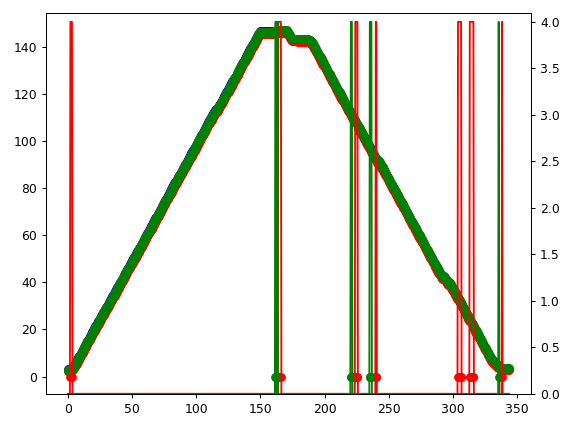

In [5]:
%matplotlib notebook
offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])
fig, ax1 = plt.subplots() 
ax1.scatter([(i-offset_timestamp) for i in time_trimble_1], distance_1, color='b')
ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], distance_2, color='r')
ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], distance_3, color='g')

#ax1.scatter([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')

ax2 = ax1.twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='b')
ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='r')
ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='g')
ax2.set_ylim(0, 4.1)
plt.show()

#plt.figure(1)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')
#plt.figure(2)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], elevation_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], elevation_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], elevation_3, color='g')

In [8]:
index_1 = []
index_2 = []
index_3 = []
time_limit = 1

begin_t = 0
for i in range(0,len(time_trimble_1_g)-1):
    if(abs(time_trimble_1_g[i+1]-time_trimble_1_g[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_1.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_1_g[i+1]-time_trimble_1_g[i])<=time_limit) and (i+1==len(time_trimble_1_g)-1)):
        index_1.append([begin_t,i+1])
        
begin_t = 0
for i in range(0,len(time_trimble_2_g)-1):
    if(abs(time_trimble_2_g[i+1]-time_trimble_2_g[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_2.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_2_g[i+1]-time_trimble_2_g[i])<=time_limit) and (i+1==len(time_trimble_2_g)-1)):
        index_2.append([begin_t,i+1])
        
begin_t = 0
for i in range(0,len(time_trimble_3_g)-1):
    if(abs(time_trimble_3_g[i+1]-time_trimble_3_g[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_3.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_3_g[i+1]-time_trimble_3_g[i])<=time_limit) and (i+1==len(time_trimble_3_g)-1)):
        index_3.append([begin_t,i+1])


In [9]:
delta_d1 = []
delta_e1 = []
delta_a1 = []
delta_d2 = []
delta_e2 = []
delta_a2 = []
delta_d3 = []
delta_e3 = []
delta_a3 = []
for i in index_1:
    for j in range(i[0],i[1]-1):
        if(time_trimble_1_g[j+1]!=time_trimble_1_g[j]):
            deltad = abs(distance_1_g[j+1]-distance_1_g[j])
            deltae = abs(elevation_1_g[j+1]-elevation_1_g[j])
            deltaa = abs(azimuth_1_g[j+1]-azimuth_1_g[j])
            if(deltaa>6):
                deltaa = abs(deltaa - 2*math.pi)
            delta_d1.append([time_trimble_1_g[j],deltad/abs(time_trimble_1_g[j+1]-time_trimble_1_g[j])])
            delta_e1.append([time_trimble_1_g[j],deltae/abs(time_trimble_1_g[j+1]-time_trimble_1_g[j])])
            delta_a1.append([time_trimble_1_g[j],deltaa/abs(time_trimble_1_g[j+1]-time_trimble_1_g[j])])
            
for i in index_2:
    for j in range(i[0],i[1]-1):
        if(time_trimble_2_g[j+1]!=time_trimble_2_g[j]):
            deltad = abs(distance_2_g[j+1]-distance_2_g[j])
            deltae = abs(elevation_2_g[j+1]-elevation_2_g[j])
            deltaa = abs(azimuth_2_g[j+1]-azimuth_2_g[j])
            if(deltaa>6):
                deltaa = abs(deltaa - 2*math.pi)
            delta_d2.append([time_trimble_2_g[j],deltad/abs(time_trimble_2_g[j+1]-time_trimble_2_g[j])])
            delta_e2.append([time_trimble_2_g[j],deltae/abs(time_trimble_2_g[j+1]-time_trimble_2_g[j])])
            delta_a2.append([time_trimble_2_g[j],deltaa/abs(time_trimble_2_g[j+1]-time_trimble_2_g[j])])
            
for i in index_3:
    for j in range(i[0],i[1]-1):
        if(time_trimble_3_g[j+1]!=time_trimble_3_g[j]):
            deltad = abs(distance_3_g[j+1]-distance_3_g[j])
            deltae = abs(elevation_3_g[j+1]-elevation_3_g[j])
            deltaa = abs(azimuth_3_g[j+1]-azimuth_3_g[j])
            if(deltaa>6):
                deltaa = abs(deltaa - 2*math.pi)
            delta_d3.append([time_trimble_3_g[j],deltad/abs(time_trimble_3_g[j+1]-time_trimble_3_g[j])])
            delta_e3.append([time_trimble_3_g[j],deltae/abs(time_trimble_3_g[j+1]-time_trimble_3_g[j])])
            delta_a3.append([time_trimble_3_g[j],deltaa/abs(time_trimble_3_g[j+1]-time_trimble_3_g[j])])

<IPython.core.display.Javascript object>


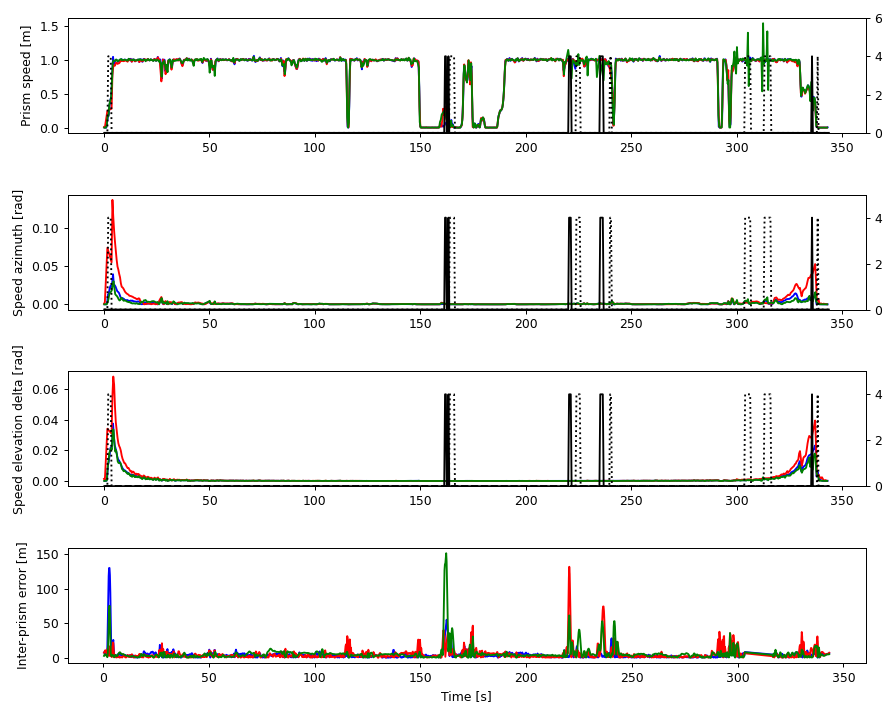

In [10]:
%matplotlib notebook

delta_d1_arr = np.array(delta_d1)
delta_a1_arr = np.array(delta_a1)
delta_e1_arr = np.array(delta_e1)
delta_d2_arr = np.array(delta_d2)
delta_a2_arr = np.array(delta_a2)
delta_e2_arr = np.array(delta_e2)
delta_d3_arr = np.array(delta_d3)
delta_a3_arr = np.array(delta_a3)
delta_e3_arr = np.array(delta_e3)
offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])
fig, ax = plt.subplots(nrows=4, figsize=(10,8))
ax[0].plot(delta_d1_arr[:,0]-offset_timestamp, delta_d1_arr[:,1], color="b", label="t1")
ax[0].plot(delta_d2_arr[:,0]-offset_timestamp, delta_d2_arr[:,1], color="r", label="t2")
ax[0].plot(delta_d3_arr[:,0]-offset_timestamp, delta_d3_arr[:,1], color="g", label="t3")
ax00 = ax[0].twinx() 
ax00.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax00.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax00.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax00.set_ylim(0, 6)
#ax[0].set_yscale('symlog')
ax[0].set_ylabel("Prism speed [m]")
#ax[0].legend(loc='best')
ax[1].plot(delta_a1_arr[:,0]-offset_timestamp, delta_a1_arr[:,1], color="b")
ax[1].plot(delta_a2_arr[:,0]-offset_timestamp, delta_a2_arr[:,1], color="r")
ax[1].plot(delta_a3_arr[:,0]-offset_timestamp, delta_a3_arr[:,1], color="g")
#ax[1].set_yscale('symlog')
ax[1].set_ylabel("Speed azimuth [rad]")
ax1 = ax[1].twinx() 
ax1.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax1.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax1.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax1.set_ylim(0, 5)
ax[2].plot(delta_e1_arr[:,0]-offset_timestamp, delta_e1_arr[:,1], color="b")
ax[2].plot(delta_e2_arr[:,0]-offset_timestamp, delta_e2_arr[:,1], color="r")
ax[2].plot(delta_e3_arr[:,0]-offset_timestamp, delta_e3_arr[:,1], color="g")
ax[2].set_ylabel("Speed elevation delta [rad]")
#ax[2].set_yscale('symlog')
ax2 = ax[2].twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax2.set_ylim(0, 5)
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,1], color="b")
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,2], color="r")
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,3], color="g")
#ax[3].set_yscale('symlog')
dist_prism
ax[3].set_xlabel("Time [s]")
ax[3].set_ylabel("Inter-prism error [m]")
#plt.savefig("./figs/20220316_raw_data.jpg")
fig.tight_layout()

<IPython.core.display.Javascript object>


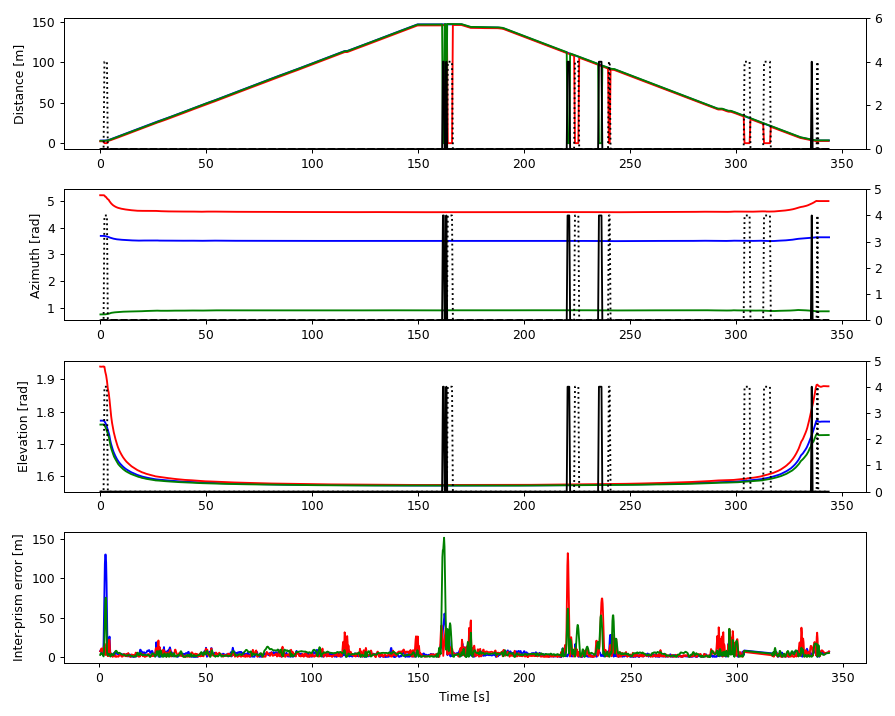

In [28]:
%matplotlib notebook

offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])
fig, ax = plt.subplots(nrows=4, figsize=(10,8))
ax[0].plot([(i-offset_timestamp) for i in time_trimble_1], distance_1, color="b", label="t1")
ax[0].plot([(i-offset_timestamp) for i in time_trimble_2], distance_2, color="r", label="t2")
ax[0].plot([(i-offset_timestamp) for i in time_trimble_3], distance_3, color="g", label="t3")
ax00 = ax[0].twinx() 
ax00.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax00.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax00.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax00.set_ylim(0, 6)
#ax[0].set_yscale('symlog')
ax[0].set_ylabel("Distance [m]")
#ax[0].legend(loc='best')
ax[1].plot([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color="b")
ax[1].plot([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color="r")
ax[1].plot([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color="g")
#ax[1].set_yscale('symlog')
ax[1].set_ylabel("Azimuth [rad]")
ax1 = ax[1].twinx() 
ax1.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax1.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax1.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax1.set_ylim(0, 5)
ax[2].plot([(i-offset_timestamp) for i in time_trimble_1], elevation_1, color="b")
ax[2].plot([(i-offset_timestamp) for i in time_trimble_2], elevation_2, color="r")
ax[2].plot([(i-offset_timestamp) for i in time_trimble_3], elevation_3, color="g")
ax[2].set_ylabel("Elevation [rad]")
#ax[2].set_yscale('symlog')
ax2 = ax[2].twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='black', linestyle = 'dashed')
ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='black', linestyle = 'dotted')
ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='black')
ax2.set_ylim(0, 5)
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,1], color="b")
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,2], color="r")
ax[3].plot(dist_prism[:,0]-offset_timestamp, dist_prism[:,3], color="g")
#ax[3].set_yscale('symlog')
dist_prism
ax[3].set_xlabel("Time [s]")
ax[3].set_ylabel("Inter-prism error [m]")
#plt.savefig("./figs/20220316_raw_data.jpg")
fig.tight_layout()

In [ ]:
diff_time1 = []
diff_time2 = []
diff_time3 = []
[(i-offset_timestamp) for i in time_trimble_1]

<IPython.core.display.Javascript object>


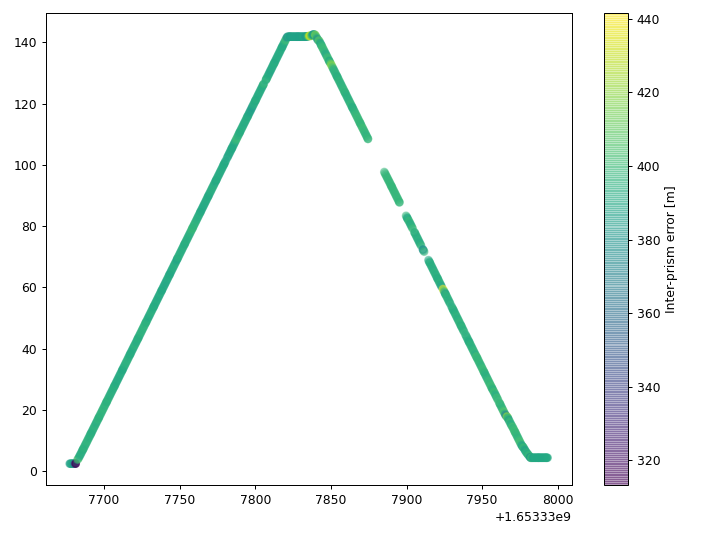

In [9]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sc=ax.scatter(err_distance_2[:,0], err_distance_2[:,1], c=err_distance_2[:,2], cmap='viridis', alpha=0.4)
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


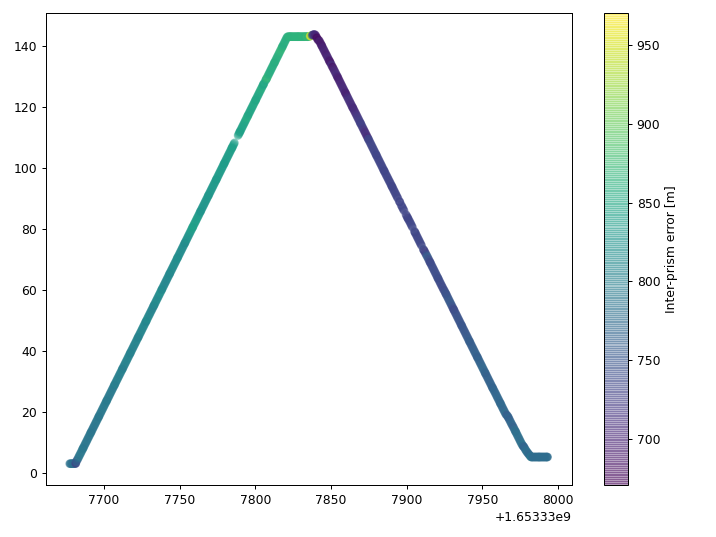

In [10]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sc=plt.scatter(err_distance_3[:,0], err_distance_3[:,1], c=err_distance_3[:,2], cmap='viridis', alpha=0.4)
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

In [10]:
dist_prism_arr = np.array(dist_prism)
err_distance_12 = []
err_distance_13 = []
err_distance_23 = []
err_azimuth_12 = []
err_azimuth_13 = []
err_azimuth_23 = []
err_elevation_12 = []
err_elevation_13 = []
err_elevation_23 = []

for i in dist_prism_arr:
    ind1, t1 = tfu.findClosest(time_trimble_1, i[0])
    ind2, t2 = tfu.findClosest(time_trimble_2, i[0])
    err_azimuth_12.append(np.array([i[0], azimuth_1[ind1], azimuth_2[ind2], i[1]]))
    err_distance_12.append(np.array([i[0], distance_1[ind1], distance_2[ind2], i[1]]))
    err_elevation_12.append(np.array([i[0], elevation_1[ind1], elevation_2[ind2], i[1]]))
    
for i in dist_prism_arr:
    ind1, t1 = tfu.findClosest(time_trimble_1, i[0])
    ind3, t3 = tfu.findClosest(time_trimble_3, i[0])
    err_azimuth_13.append(np.array([i[0], azimuth_1[ind1], azimuth_3[ind3], i[2]]))
    err_distance_13.append(np.array([i[0], distance_1[ind1], distance_3[ind3], i[2]]))
    err_elevation_13.append(np.array([i[0], elevation_1[ind1], elevation_3[ind3], i[2]]))
    
for i in dist_prism_arr:
    ind2, t2 = tfu.findClosest(time_trimble_2, i[0])
    ind3, t3 = tfu.findClosest(time_trimble_3, i[0])
    err_azimuth_23.append(np.array([i[0], azimuth_2[ind2], azimuth_3[ind3], i[3]]))
    err_distance_23.append(np.array([i[0], distance_2[ind2], distance_3[ind3], i[3]]))
    err_elevation_23.append(np.array([i[0], elevation_2[ind2], elevation_3[ind3], i[3]]))

In [26]:
# Sort data for 2.5D plot
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []

list_dataset_GP = ["./data/prediction/TS/20220312/"]

list_calib = ["./data/total_station/20220312/theodolite_reference_prisms.txt"]

list_rosbag = ["/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"]

speed_l = []
angular_l = []
accel_l = []
error_l = []
timestamp_l = []
for path,file_rosbag_theodolite in zip(list_dataset_GP,list_rosbag):
    timestamp_list, linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.process_data_TS(path, Inter_distance[2], file_rosbag_theodolite)
    timestamp_l = timestamp_l + timestamp_list
    speed_l = speed_l + linear_speed_list
    angular_l = angular_l + angular_speed_list
    accel_l = accel_l + accel_list
    error_l = error_l + mean_error_prisms_list
    print(len(error_l))

Linear velocity reading
Angular velocity reading
Finish !
49536


<IPython.core.display.Javascript object>


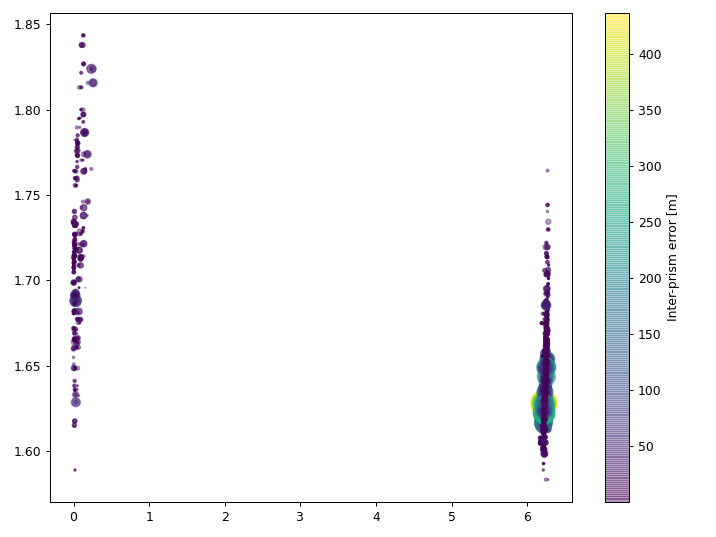

In [13]:
%matplotlib notebook
err_arr = np.array(err_azimuth_12)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sc=plt.scatter(err_arr[:,1], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


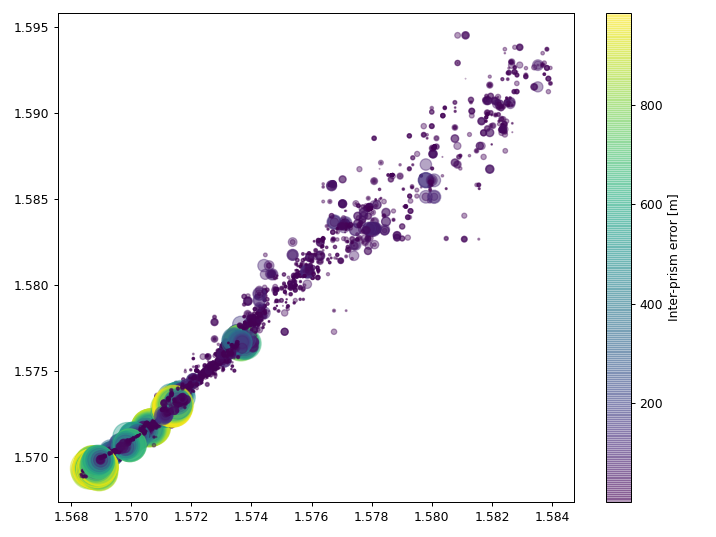

In [14]:
%matplotlib notebook
err_arr = np.array(err_elevation_23)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sc=plt.scatter(err_arr[:,1], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


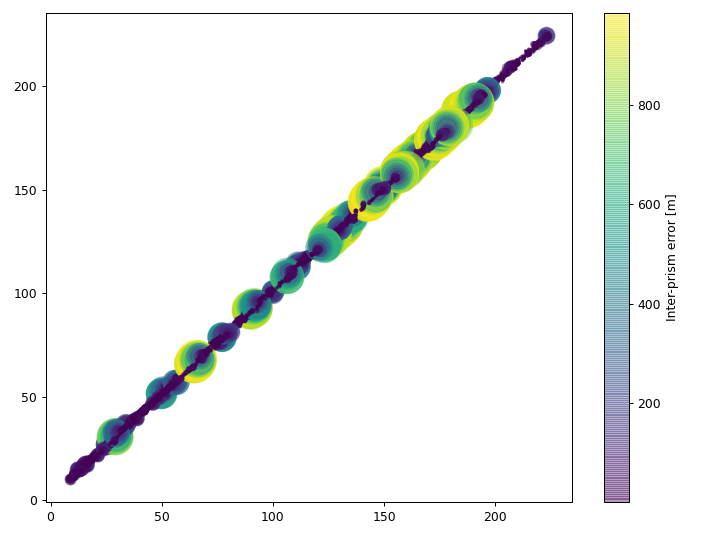

In [20]:
%matplotlib notebook
err_arr = np.array(err_distance_23)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sc=plt.scatter(err_arr[:,1], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

16515


<IPython.core.display.Javascript object>


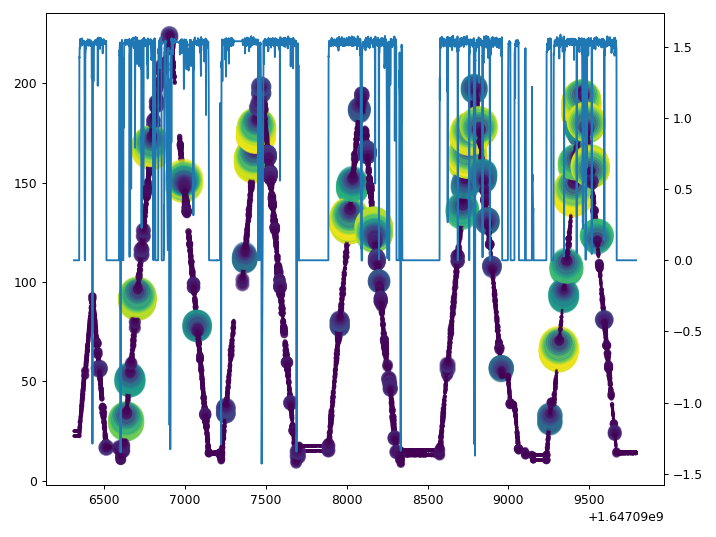

In [28]:
%matplotlib notebook
err_arr = np.array(err_distance_23)
speed_arr = np.array(speed_l)
#print(error_l)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,0], err_arr[:,1], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,0], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax2 = ax.twinx() 
ax2.plot(timestamp_l,speed_l)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


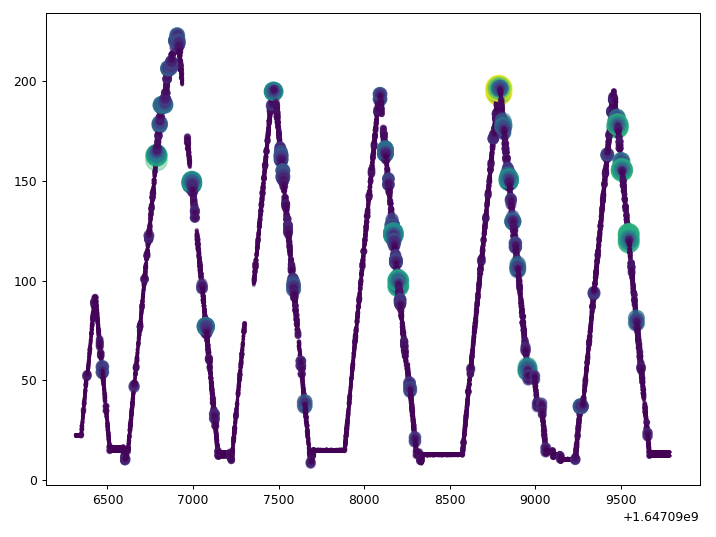

In [37]:
err_arr = np.array(err_distance_12)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,0], err_arr[:,1], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,0], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


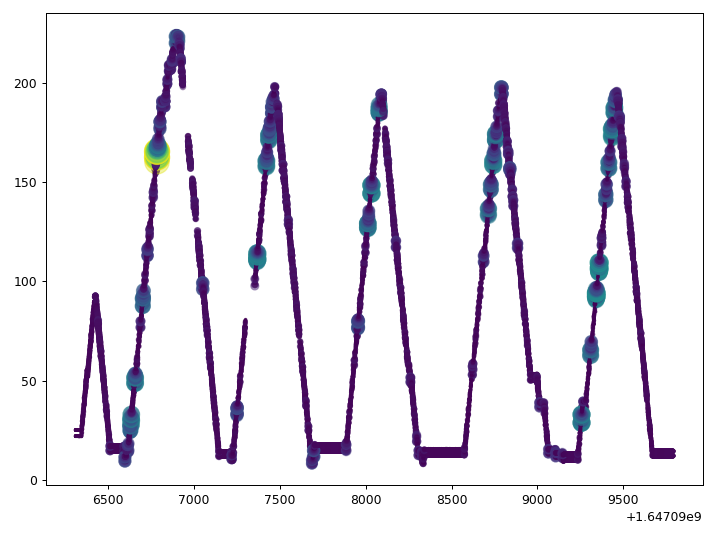

In [84]:
err_arr = np.array(err_distance_13)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,0], err_arr[:,1], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,0], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


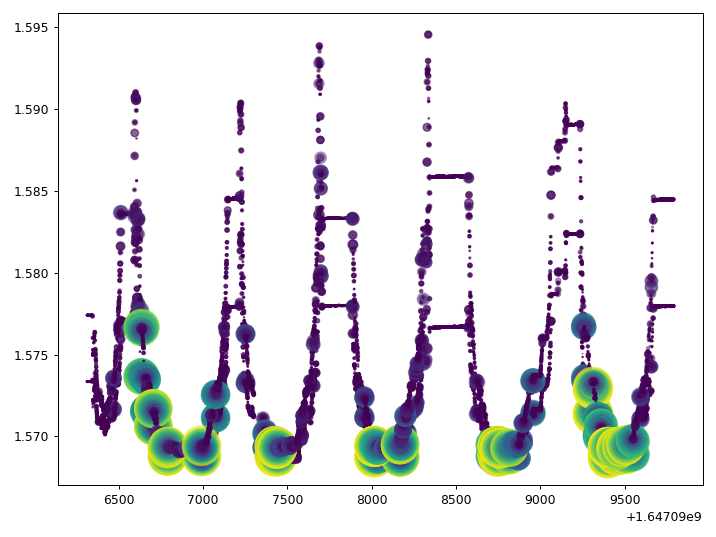

In [85]:
err_arr = np.array(err_elevation_23)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,0], err_arr[:,1], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,0], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

<IPython.core.display.Javascript object>


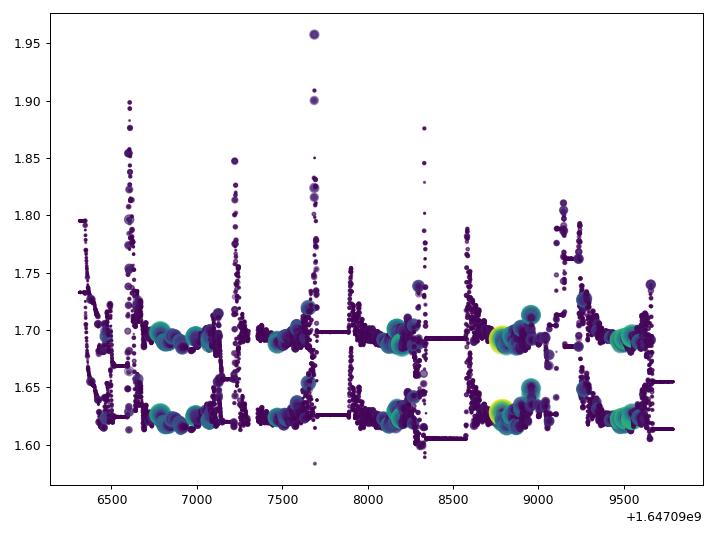

In [75]:
err_arr = np.array(err_azimuth_23)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,0], err_arr[:,1], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,0], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

In [7]:
tfuu = importlib.reload(tfuu)
path = "./data/prediction/TS/20220312/"
index_prism = 2
prefix = "GP-10-20"
P1 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

path = "./data/total_station/20220312/"

time_trimble_1, trimble_1 = tfuu.read_point_data_csv_file(path+"trimble1.csv")
time_trimble_2, trimble_2 = tfuu.read_point_data_csv_file(path+"trimble2.csv")
time_trimble_3, trimble_3 = tfuu.read_point_data_csv_file(path+"trimble3.csv")



 /home/norlab/Repo_git/code_publication_IROS2022_MaximeVaidis/scripts/theodolite_utils.py:349: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [23]:
print(P1)

[[ 1.64709631e+09  2.19658038e+01 -5.88316835e-01 ...  6.23452206e-06
   1.51515216e-06  5.86443429e-07]
 [ 1.64709631e+09  2.19657935e+01 -5.88322569e-01 ...  1.32347577e-06
   3.37144283e-07  6.16256951e-07]
 [ 1.64709631e+09  2.19658307e+01 -5.88309192e-01 ...  7.68437758e-06
   1.96518897e-06  6.83641677e-07]
 ...
 [ 1.64709979e+09  1.19901767e+01  5.19236054e-01 ...  1.78329062e-05
   1.28328314e-07  4.41065087e-07]
 [ 1.64709979e+09  1.19901938e+01  5.19294318e-01 ...  1.77942976e-05
   3.62506295e-08  4.38415760e-07]
 [ 1.64709979e+09  1.19899904e+01  5.19342463e-01 ...  1.88899003e-05
   3.07998833e-07  4.86043017e-07]]


<IPython.core.display.Javascript object>


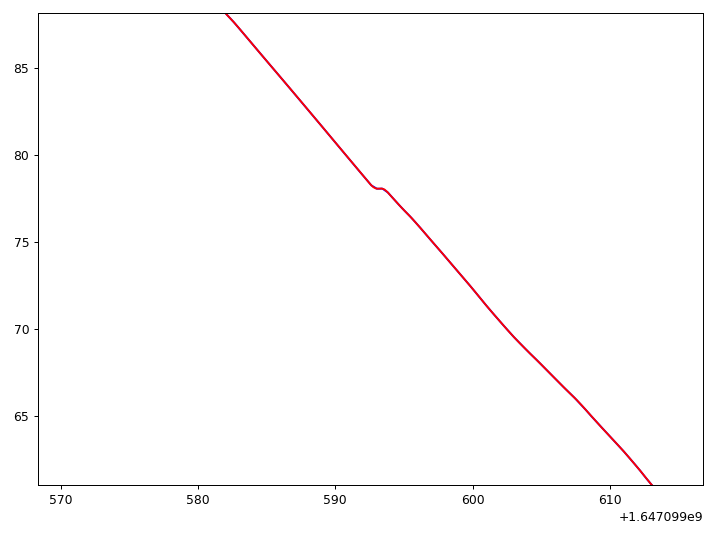

In [30]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(trimble_3)[0,:], color='b')
ax.plot(np.array(P3)[:,0], np.array(P3)[:,1], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


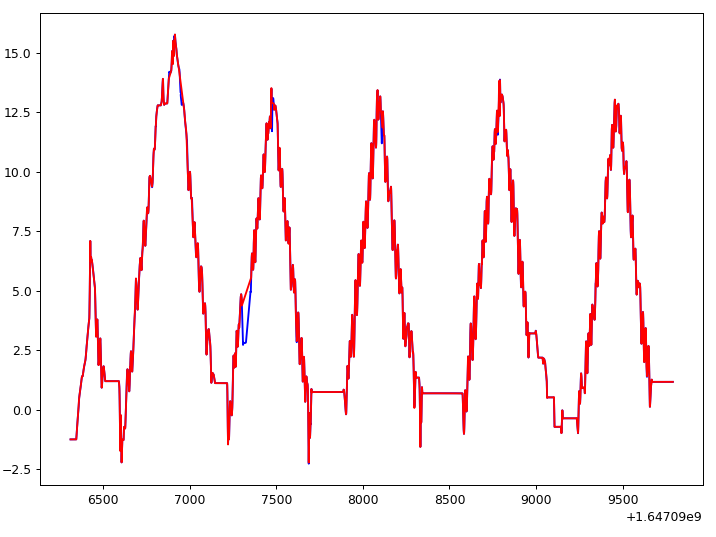

In [31]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(trimble_3)[1,:], color='b')
ax.plot(np.array(P3)[:,0], np.array(P3)[:,2], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


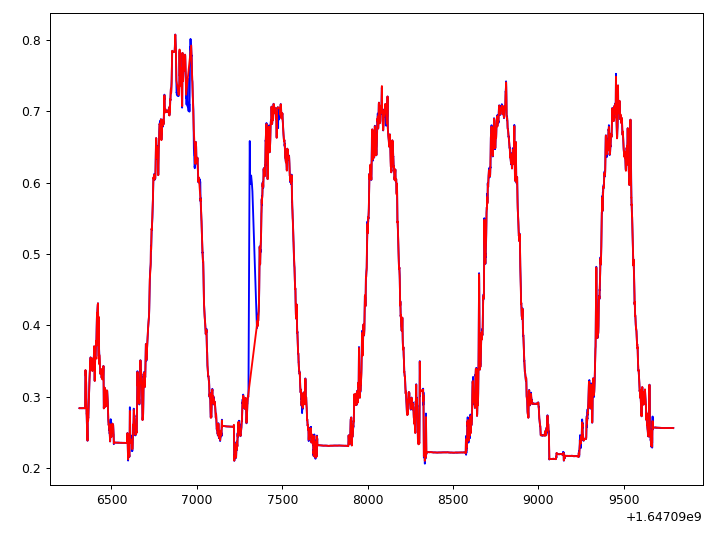

In [32]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(trimble_3)[2,:], color='b')
ax.plot(np.array(P3)[:,0], np.array(P3)[:,3], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


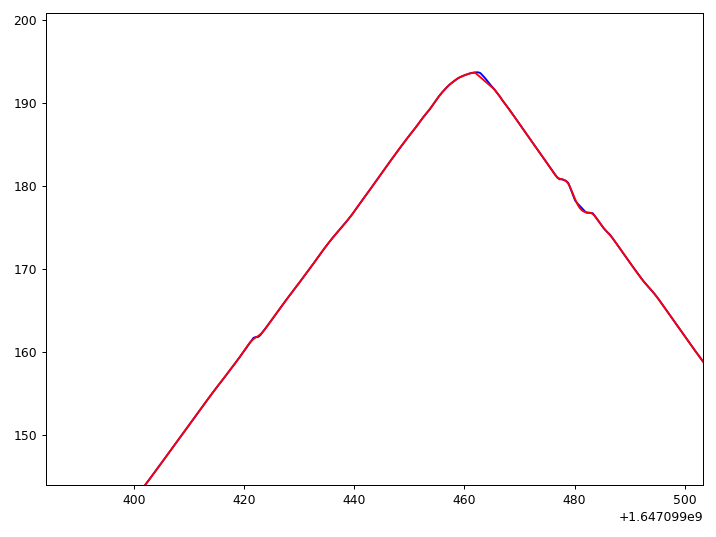

In [33]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_2), np.array(trimble_2)[0,:], color='b')
ax.plot(np.array(P2)[:,0], np.array(P2)[:,1], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


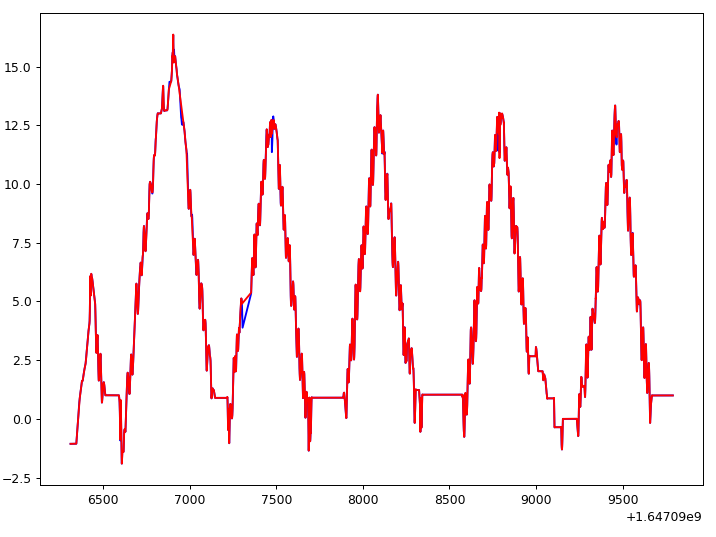

In [34]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_2), np.array(trimble_2)[1,:], color='b')
ax.plot(np.array(P2)[:,0], np.array(P2)[:,2], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


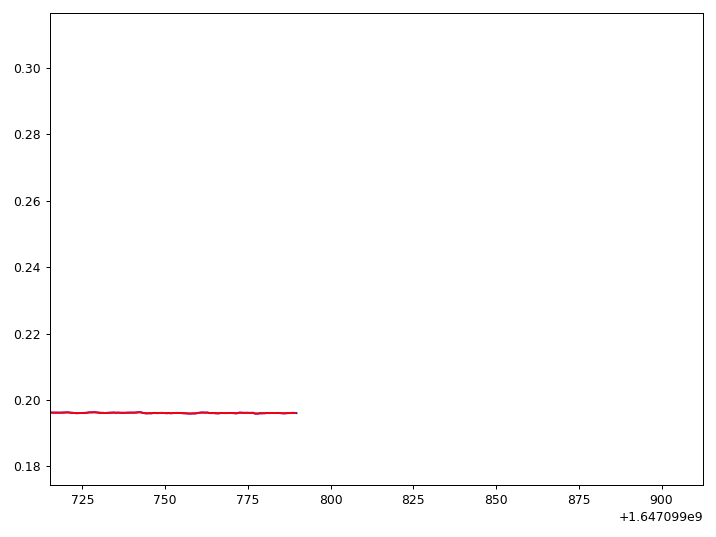

In [35]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_2), np.array(trimble_2)[2,:], color='b')
ax.plot(np.array(P2)[:,0], np.array(P2)[:,3], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


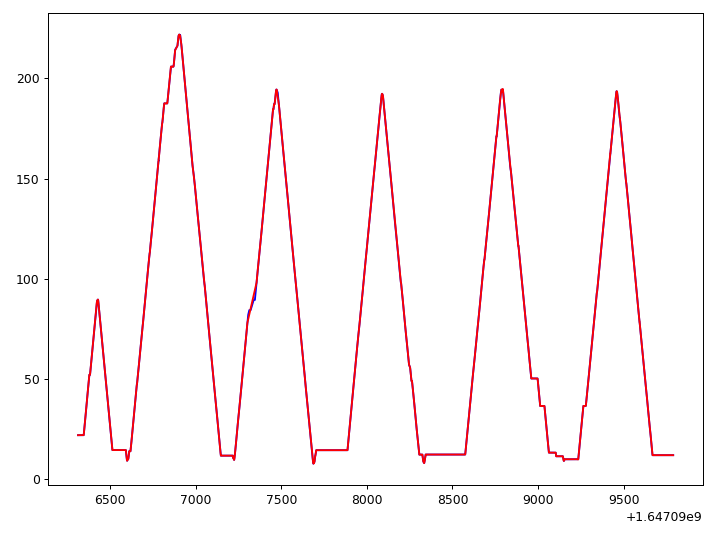

In [36]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_1), np.array(trimble_1)[0,:], color='b')
ax.plot(np.array(P1)[:,0], np.array(P1)[:,1], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


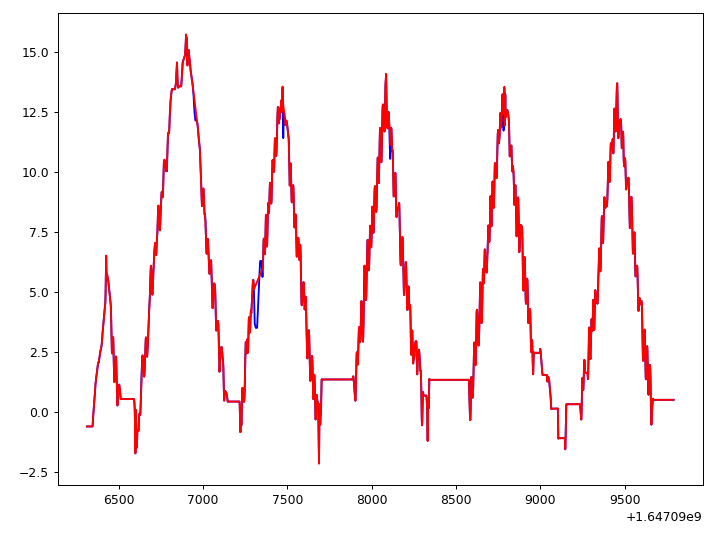

In [38]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_1), np.array(trimble_1)[1,:], color='b')
ax.plot(np.array(P1)[:,0], np.array(P1)[:,2], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


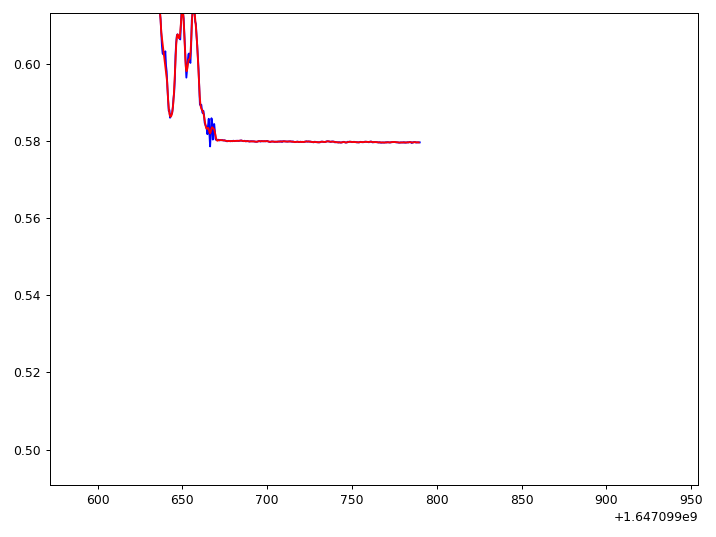

In [39]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_1), np.array(trimble_1)[2,:], color='b')
ax.plot(np.array(P1)[:,0], np.array(P1)[:,3], color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


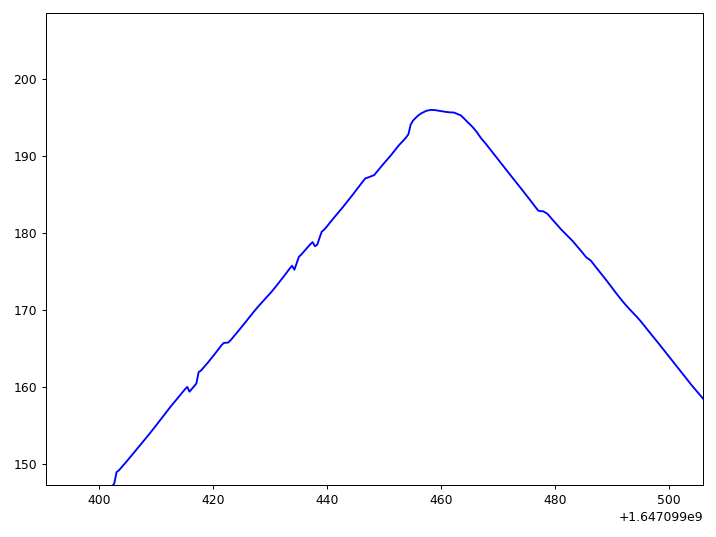

In [40]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(distance_3), color='b')
fig.tight_layout()

<IPython.core.display.Javascript object>


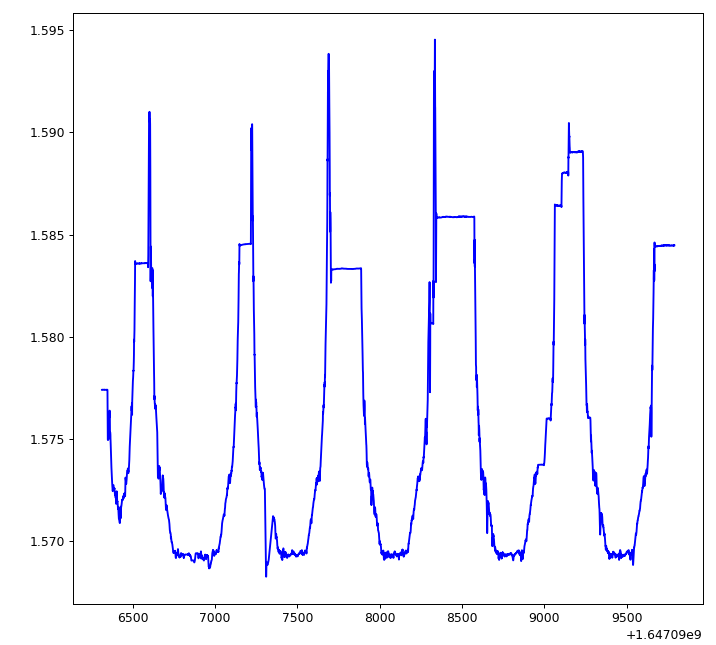

In [41]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(elevation_3), color='b')
fig.tight_layout()

<IPython.core.display.Javascript object>


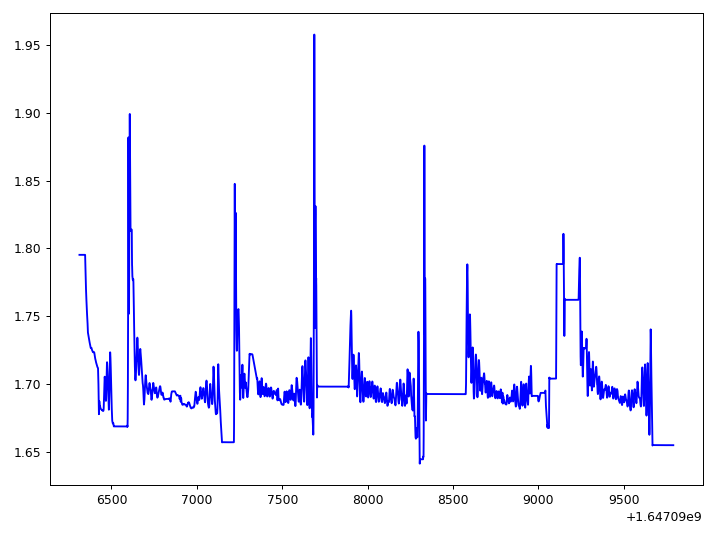

In [42]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.plot(np.array(time_trimble_3), np.array(azimuth_3), color='b')
fig.tight_layout()

<IPython.core.display.Javascript object>


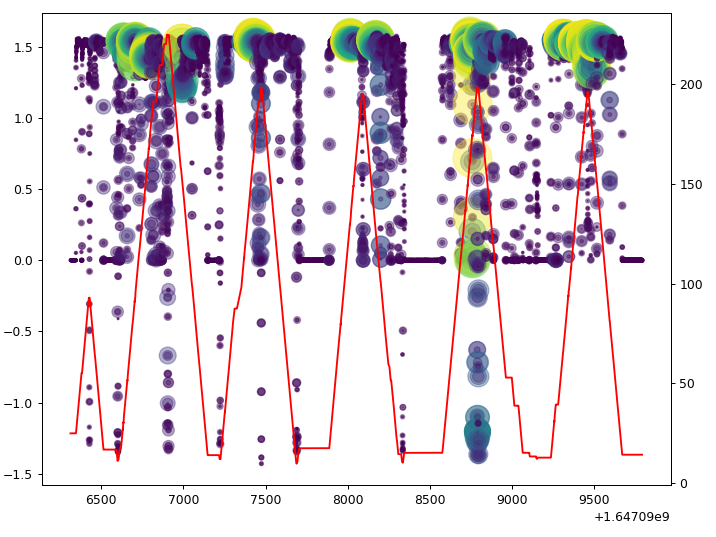

In [40]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(np.array(timestamp_l), np.array(speed_l), s=np.array(error_l), c=np.array(error_l), cmap='viridis', alpha=0.4)
ax2 = ax.twinx() 
ax2.plot(np.array(time_trimble_3), np.array(distance_3), color='r')
fig.tight_layout()

<IPython.core.display.Javascript object>


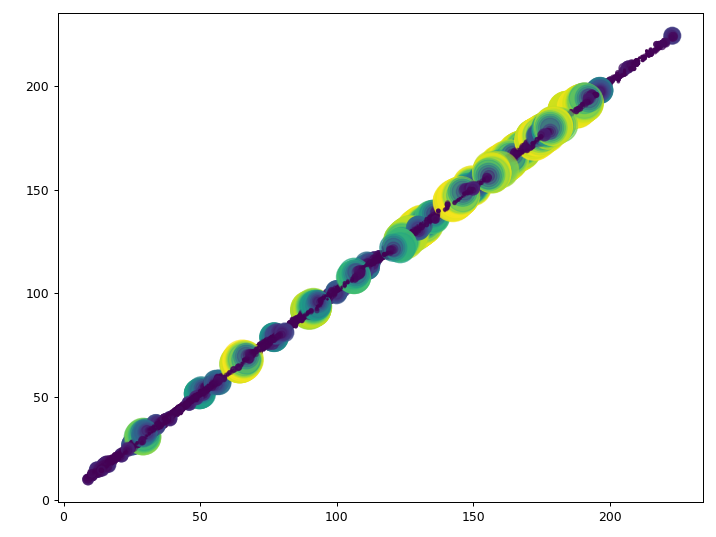

In [41]:
%matplotlib notebook
err_arr = np.array(err_distance_23)
#print(error_l)
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
ax.scatter(err_arr[:,1], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
ax.scatter(err_arr[:,1], err_arr[:,2], s=err_arr[:,3], c=err_arr[:,3], cmap='viridis', alpha=0.4)
#plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

In [ ]:
time_trimble_1, time_trimble_2, time_trimble_3, 
distance_1, distance_2, distance_3, 
azimuth_1, azimuth_2, azimuth_3, 
elevation_1, elevation_2, elevation_3

In [4]:
index_1 = []
index_2 = []
index_3 = []
time_limit = 1

begin_t = 0
for i in range(0,len(time_trimble_1)-1):
    if(abs(time_trimble_1[i+1]-time_trimble_1[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_1.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_1[i+1]-time_trimble_1[i])<=time_limit) and (i+1==len(time_trimble_1)-1)):
        index_1.append([begin_t,i+1])
        
begin_t = 0
for i in range(0,len(time_trimble_2)-1):
    if(abs(time_trimble_2[i+1]-time_trimble_2[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_2.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_2[i+1]-time_trimble_2[i])<=time_limit) and (i+1==len(time_trimble_2)-1)):
        index_2.append([begin_t,i+1])
        
begin_t = 0
for i in range(0,len(time_trimble_3)-1):
    if(abs(time_trimble_3[i+1]-time_trimble_3[i])>time_limit):
        if(abs((i-1)-begin_t>=2)):
            index_3.append([begin_t,i-1])
            begin_t = i
    if((abs(time_trimble_3[i+1]-time_trimble_3[i])<=time_limit) and (i+1==len(time_trimble_3)-1)):
        index_3.append([begin_t,i+1])


In [5]:
delta_d1 = []
delta_e1 = []
delta_a1 = []
delta_d2 = []
delta_e2 = []
delta_a2 = []
delta_d3 = []
delta_e3 = []
delta_a3 = []
for i in index_1:
    for j in range(i[0],i[1]-1):
        deltad = abs(distance_1[j+1]-distance_1[j])
        deltae = abs(elevation_1[j+1]-elevation_1[j])
        deltaa = abs(azimuth_1[j+1]-azimuth_1[j])
        if(deltaa>6):
            deltaa = abs(deltaa - 2*math.pi)
        delta_d1.append([time_trimble_1[j],deltad])
        delta_e1.append([time_trimble_1[j],deltae])
        delta_a1.append([time_trimble_1[j],deltaa])
for i in index_2:
    for j in range(i[0],i[1]-1):
        deltad = abs(distance_2[j+1]-distance_2[j])
        deltae = abs(elevation_2[j+1]-elevation_2[j])
        deltaa = abs(azimuth_2[j+1]-azimuth_2[j])
        if(deltaa>6):
            deltaa = abs(deltaa - 2*math.pi)
        delta_d2.append([time_trimble_2[j],deltad])
        delta_e2.append([time_trimble_2[j],deltae])
        delta_a2.append([time_trimble_2[j],deltaa])
for i in index_3:
    for j in range(i[0],i[1]-1):
        deltad = abs(distance_3[j+1]-distance_3[j])
        deltae = abs(elevation_3[j+1]-elevation_3[j])
        deltaa = abs(azimuth_3[j+1]-azimuth_3[j])
        if(deltaa>6):
            deltaa = abs(deltaa - 2*math.pi)
        delta_d3.append([time_trimble_3[j],deltad])
        delta_e3.append([time_trimble_3[j],deltae])
        delta_a3.append([time_trimble_3[j],deltaa])

<IPython.core.display.Javascript object>


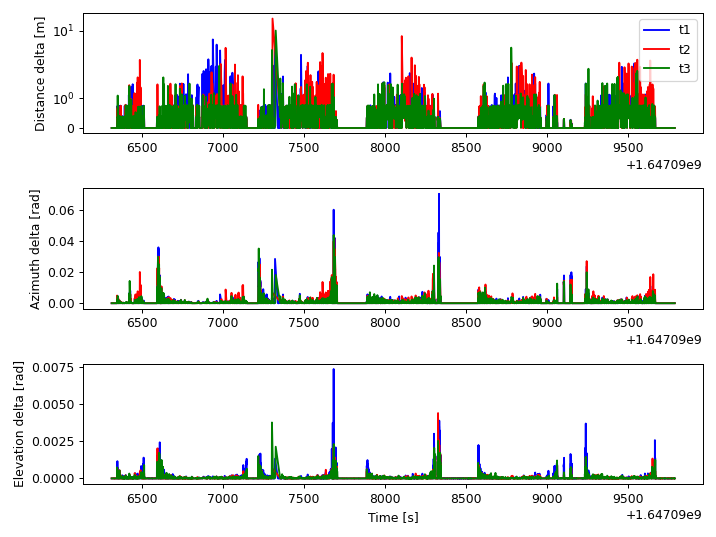

In [6]:
%matplotlib notebook

delta_d1_arr = np.array(delta_d1)
delta_a1_arr = np.array(delta_a1)
delta_e1_arr = np.array(delta_e1)
delta_d2_arr = np.array(delta_d2)
delta_a2_arr = np.array(delta_a2)
delta_e2_arr = np.array(delta_e2)
delta_d3_arr = np.array(delta_d3)
delta_a3_arr = np.array(delta_a3)
delta_e3_arr = np.array(delta_e3)
fig, ax = plt.subplots(nrows=3, figsize=(8,6))
ax[0].plot(delta_d1_arr[:,0], delta_d1_arr[:,1], color="b", label="t1")
ax[0].plot(delta_d2_arr[:,0], delta_d2_arr[:,1], color="r", label="t2")
ax[0].plot(delta_d3_arr[:,0], delta_d3_arr[:,1], color="g", label="t3")
ax[0].set_yscale('symlog')
ax[0].set_ylabel("Distance delta [m]")
ax[0].legend(loc='best')
ax[1].plot(delta_a1_arr[:,0], delta_a1_arr[:,1], color="b")
ax[1].plot(delta_a2_arr[:,0], delta_a2_arr[:,1], color="r")
ax[1].plot(delta_a3_arr[:,0], delta_a3_arr[:,1], color="g")
#ax[1].set_yscale('symlog')
ax[1].set_ylabel("Azimuth delta [rad]")
ax[2].plot(delta_e1_arr[:,0], delta_e1_arr[:,1], color="b")
ax[2].plot(delta_e2_arr[:,0], delta_e2_arr[:,1], color="r")
ax[2].plot(delta_e3_arr[:,0], delta_e3_arr[:,1], color="g")
#ax[2].set_yscale('symlog')
ax[2].set_xlabel("Time [s]")
ax[2].set_ylabel("Elevation delta [rad]")
fig.tight_layout()

<IPython.core.display.Javascript object>


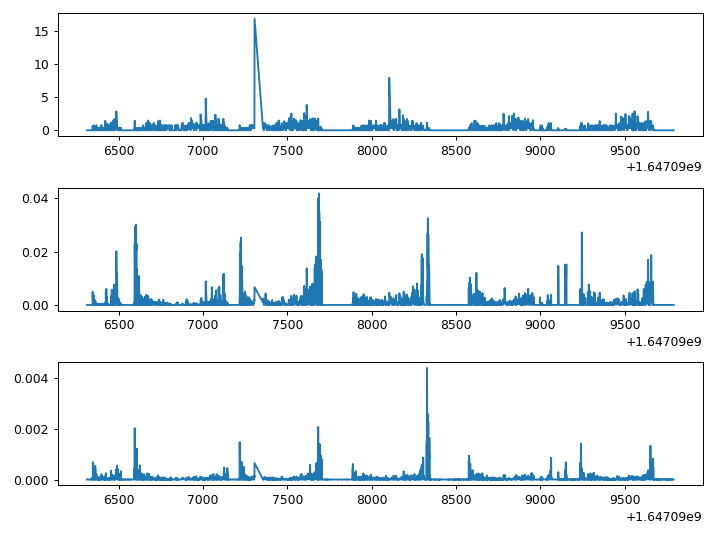

In [7]:
%matplotlib notebook
delta_d2_arr = np.array(delta_d2)
delta_a2_arr = np.array(delta_a2)
delta_e2_arr = np.array(delta_e2)
delta_d3_arr = np.array(delta_d3)
delta_a3_arr = np.array(delta_a3)
delta_e3_arr = np.array(delta_e3)
fig, ax = plt.subplots(nrows=3, figsize=(8,6))
ax[0].plot(delta_d2_arr[:,0], delta_d2_arr[:,1])
ax[1].plot(delta_a2_arr[:,0], delta_a2_arr[:,1])
ax[2].plot(delta_e2_arr[:,0], delta_e2_arr[:,1])
fig.tight_layout()

<IPython.core.display.Javascript object>


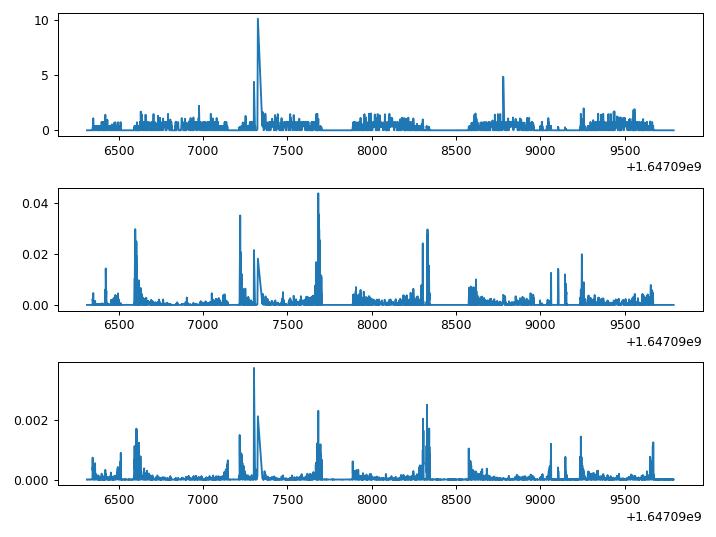

In [8]:
%matplotlib notebook
delta_d3_arr = np.array(delta_d3)
delta_a3_arr = np.array(delta_a3)
delta_e3_arr = np.array(delta_e3)
fig, ax = plt.subplots(nrows=3, figsize=(8,6))
ax[0].plot(delta_d3_arr[:,0], delta_d3_arr[:,1])
ax[1].plot(delta_a3_arr[:,0], delta_a3_arr[:,1])
ax[2].plot(delta_e3_arr[:,0], delta_e3_arr[:,1])
fig.tight_layout()